In [1]:
import numpy as np
import matplotlib as mpl
import matplotlib.pyplot as plt
import datetime
import pandas as pd

In [2]:
import sys
import os 
sys.path.insert(0, os.path.abspath('../packages'))
import steps, functions, optimizers

In [3]:
step = steps.GoldenSectionStep(da = 0.01, tol = 1e-8, check_direction=True, normalize=False)

In [4]:
def f(x1, x2):

    return x1**2 - 3*x1*x2 + 4*x2**2 + x1 - x2

def gradf(x1, x2):

    return np.array(
        [2*x1 - 3*x2 + 1, -3*x1 + 8*x2 - 1]
    )

def hessf(x1, x2):

    return np.array(
        [
        [ 2, -3],
        [-3,  8]
        ]
    )

f = functions.AnalyticalSpecialFunction(f, gradf, hessf)

p_inicial = np.array([2, 2])

In [5]:
optimizrs = [
    ('Univariant', optimizers.UnivariantOptimizer(tol=1e-5, max_iter=3)),
    ('Powell', optimizers.PowellOptimizer(tol=1e-5, max_iter=3)),
    ('Steepest', optimizers.SteepestDescentOptimizer(tol=1e-5, max_iter=3)),
    ('FletchRvs', optimizers.FletcherReevesOptimizer(tol=1e-5, max_iter=3)),
    ('NewtnRaph', optimizers.NewtonRaphsonOptimizer(tol=1e-5, max_iter=3)),
    ('BFGS', optimizers.BFGSOptimizer(tol=1e-5, max_iter=3)),
]

Univariant: p_final = [1.093750, 1.062500, 2.256836].T. Execução:0:00:00.004896, 3 iterações
Univariant: $\alpha$ = [0.5000000194465892, -0.9374999905939169, -1.4062499852564538]
Powell: p_final = [2.432024, 1.189955, 4.138784].T. Execução:0:00:00.001473, 3 iterações
Powell: $\alpha$ = [0.5000000194465892, -0.9374999905939169, -0.13595165533814726]
Steepest: p_final = [0.484934, 0.320841, 0.344249].T. Execução:0:00:00.001107, 3 iterações
Steepest: $\alpha$ = [0.11647726988022164, 0.7068967564166622, 0.11647726988022163]
FletchRvs: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001156, 2 iterações
FletchRvs: $\alpha$ = [0.11647726988022164, 1.2264808653587485]
NewtnRaph: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001179, 1 iterações
NewtnRaph: $\alpha$ = [1.0000000012688435]
BFGS: p_final = [-0.714286, -0.142857, -0.285714].T. Execução:0:00:00.001255, 2 iterações
BFGS: $\alpha$ = [0.11647726988022164, 1.2264808372153804]


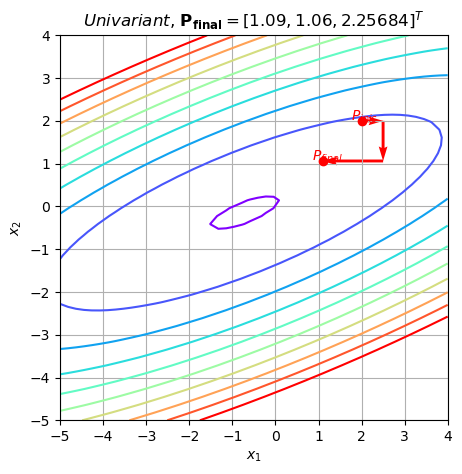

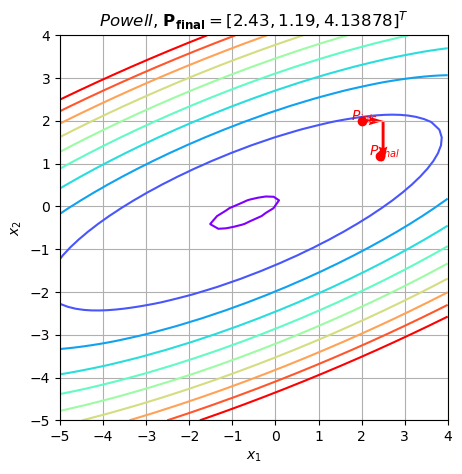

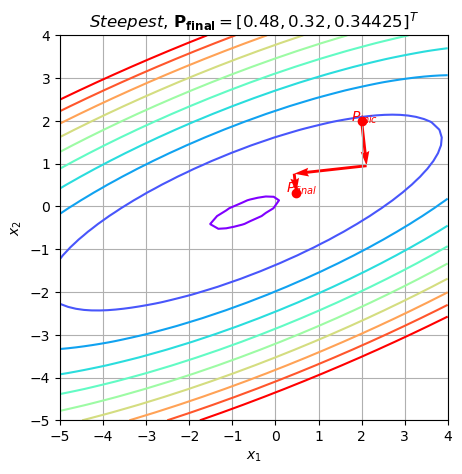

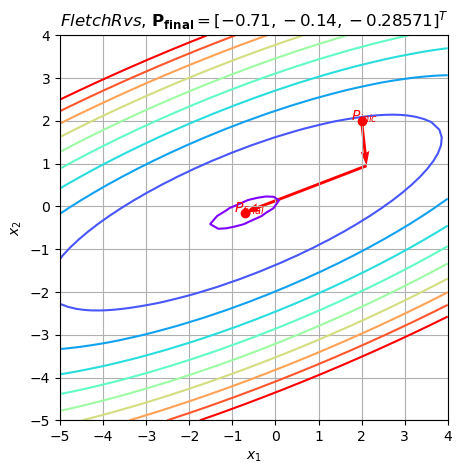

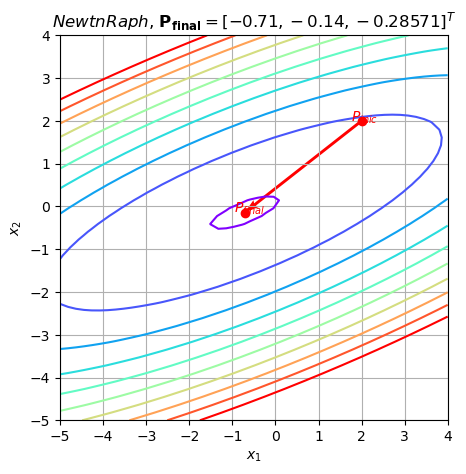

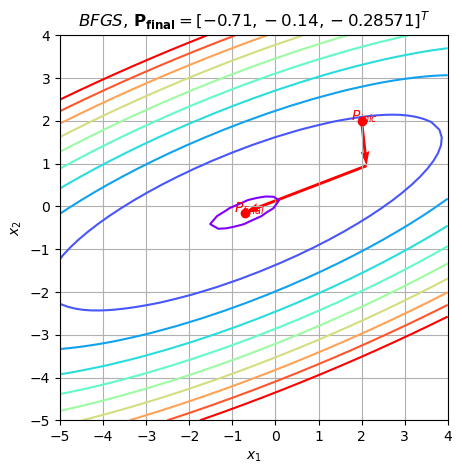

In [9]:
item = ''

x = np.linspace(-5, 4, 50)
y = np.linspace(-5, 4, 50)
X, Y = np.meshgrid(x, y)
Z = f(X, Y)


for name, optimizer in optimizrs:
    t_init = datetime.datetime.now()
    p_final = optimizer(f, p_inicial, step)
    t_final = datetime.datetime.now()
    print(f'{name}: p_final = [{p_final[0]:.6f}, {p_final[1]:.6f}, {f(*p_final):.6f}].T. Execução:{t_final - t_init}, {optimizer.iter} iterações')
    print(f'{name}: $\\alpha$ = {optimizer.cache_a[1:]}')
    fig, ax = plt.subplots(1,1, figsize=(5, 5))
    ax.contour(X, Y, Z, np.linspace(-0, 80, 10),cmap='rainbow')
    ax.plot(*p_inicial, 'ro')
    ax.text(p_inicial[0]-0.25, p_inicial[1], '$P_{inic}$', color='red')
    ax.plot(*p_final, 'ro')
    ax.text(p_final[0]-0.25, p_final[1], '$P_{final}$', color='red')
    cache = optimizer.get_history()
    for i in range(len(cache)-1):
        p_i = cache[i]
        p_f = cache[i+1]
        ax.quiver(p_i[0], p_i[1], p_f[0]-p_i[0], p_f[1]-p_i[1], color='red', angles='xy', scale_units='xy', scale=1)#, label='Passo completo')
    ax.grid()
    #ax.legend()
    ax.set_xlabel('$x_1$')
    ax.set_ylabel('$x_2$')
    ax.set_title(f'${name}$, $\mathbf{{P_{{final}}}} = [{p_final[0]:.2f}, {p_final[1]:.2f}, {f(*p_final):.5f}]^T$')
    fig.savefig(f'images/q1{item}_{name}.pdf')

In [7]:
optimizrs[0][1].cache_grad

[array([-1,  9]),
 array([3.88931785e-08, 7.49999994e+00]),
 array([2.81250001e+00, 1.69088965e-08]),
 array([4.01620217e-08, 4.21874997e+00])]